# KNN
- ## K-Nearest Neighbours

In [7]:
import numpy as np
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

- Euclidean distance is the straight-line distance between two points in space
- $Euclidean Distance= 
((x 
2
​
 −x 
1
​
 ) 
2
 +(y 
2
​
 −y 
1
​
 ) 
2)^ 1/2
$
​


In [2]:
#This function will compute the Euclidean Distance and takes 2 arrays as input.
def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum(x1 - x2)**2)
    return distance
    

## KNN CLASS

In [26]:
class KNN:
    def __init__(self, k):
        self.k = k
    
    def fit(self,X,y):
        
        #These are the values of the dataset
        self.X_train = X
        self.y_train = y
        
    #This function will assign predictions based on the distances of the object from all the other objects.
    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions
        
    
    #Creating a helper function which will calculate the Eucledian distance of a given object from a single object in the dataset.
    def _predict(self, x):
        #Compute the distances
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train ]
        
        #Get the nearest k neighbours
        
        #argsort() returns the indices of the values as they would appear in a sorted order.Basically it returns indices based on sorted order.
        #Indexing upto self.k means we are getting the closest k neighbors indices. 
        nearest_neighbors_indices  = np.argsort(distances)[:self.k]
        
        nearest_neighbors_labels = [self.y_train[i] for i in nearest_neighbors_indices]
        
        #Get the majority vote from the k neighbours
        majority_vote = Counter(nearest_neighbors_labels).most_common()
        
        return majority_vote[0][0]
        
        
        
        
         
    
     

## Model Inference

In [ ]:
dataset = datasets.load_iris()
X, y = dataset.data , dataset.target

In [11]:
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


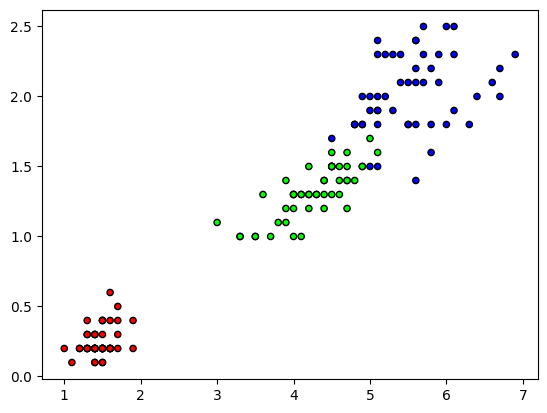

In [27]:
#Visualizing the dataset plot

plt.figure()
plt.scatter(X[:,2], X[:,3], c=y, cmap=cmap, edgecolors='k', s=20)
plt.show()

- Using the KNN class

In [28]:
model = KNN(k=5)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

### Visualizing the predictions

In [29]:
predictions

[1,
 1,
 2,
 1,
 2,
 0,
 1,
 2,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 1,
 1,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0]

In [30]:
accuracy = np.sum(predictions == y_test) / len(y_test)

print("="*30,f"Accuracy :-{accuracy*100:.2f}%","="*30)

============================== Accuracy :-90.00% ==============================


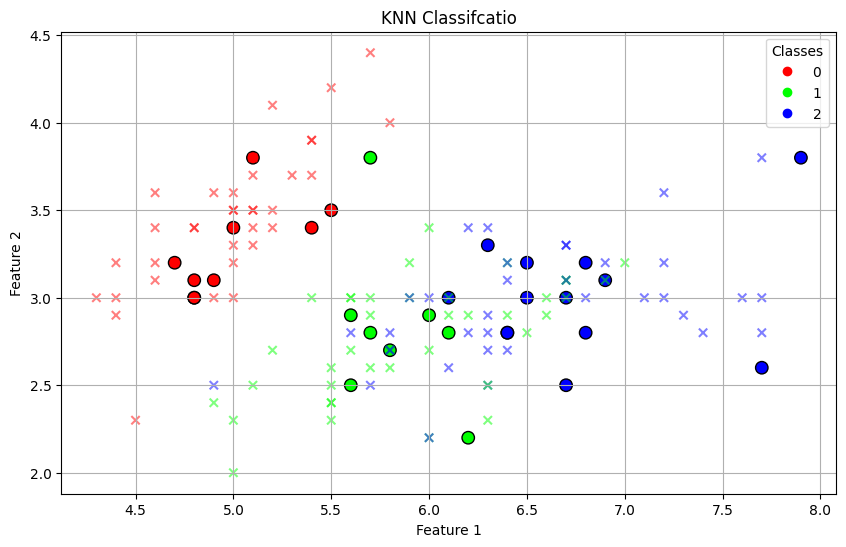

In [31]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap=cmap, marker='o', label='Predicted', edgecolors = 'k', s=80)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=cmap, marker='x', label='Train', alpha=0.5)

plt.legend(*scatter.legend_elements(), title='Classes')
plt.title(  "KNN Classifcatio")
plt.xlabel("Feature 1")
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()
